# **THE PSEUDO MARGINAL APPROACH FOR EFFICIENT MONTE CARLO COMPUTATION**

**Members:**
- Jinyi Li
- Dang Nguyen
- Kaixian Huang
- Marko Avila
- Martin Briceno


## **General context:**

### What's is the context and the problem?

> In many problems **we are interested in knowing the probability distribution of a random variable** in order to perform different tasks such as predicting future values of this one for example. There are cases in which we know its density or a function that is proportional to it, therefore in those cases the Metropolis-Hasting algorithm is useful. However, when we do not have this function or is not available analytically, we must proceed otherwise, for example by using pseudo-marginal algorithms that use estimators of this target density to simulate a markov chain whose invariant distribution  tends to the true distribution.

> This article was conceived by Christophe Andrieu and Gareth Roberts both researchers from the University of Bristol and the University of Warwick. **It aims to introduce a powerful and performing Markov Chain Monte Carlo (MCMC) algorithm for stochastic simulation**.

> The application of MCMC is related to the **"curse of dimensionality"**. 
Consider we know a distribution on R. If we want to calculate its mathematical expectation, we can do it using integral , which is usually painful because the majority distributions in practice can't be integrated, so what is left? Sampling, so maybe we  can take 100 points with equal distance which can roughly guarantee the accuracy. However, considering a distribution of $R^{50}$, the "equal distance" is used to take 100 points in each dimension, so $50^{100}$ points are taken. we only have $10^{87}$ elementary particles in the known universe. How painful it is.

>If we carefully observe the results of the **"equal distance sampling"** (Histogram), we will find that the probability of most points is very small, and the probability of a few points is very high. And if we ignore most of the points with low probability and only calculate the small part of points with high probability, the effect on the final mathematical expectation is very small. Which inspired MCMC methods. The probabilistic model used by MCMC often has a huge parameter dimension, but the supporting set of each parameter is very small.

### What are the statistical models considered?


> The powerful algorithm introduced in this article is based on a **pseudo-marginal for efficient Monte Carlo**, however this method was first introduced in [Genetics 164 (2003) 1139–1160], which shows a great property:

> **Algorithms which are normally approximations of an idealized marginal algorithm can share the same marginal stationary distribution as that of the ideal method.**

> We will also compare this algorithms to the **Metropolis–Hastings algorithm** because this one have an ideal performance.

### What are the main ideas proposed to solve the problem ?

#### Main idea:

> The article proposes two algorithms to solve the problem posed, these algorithms are **MCWM and GIMH**. Both are pseudo-marginal methods. The idea behind both algorithms is the **introduction of auxiliary variables and a probability density estimator, which will be used to simulate an ergodic Markov chain whose invariant probability density is the one we are looking for**. It relies on the fact that the Metropolis–Hastings algorithm can still sample from the correct target distribution if the target density in the acceptance ratio is replaced by an estimate. We will see that while MCWM gives us approximations of target density, GIMH will allow us to achieve our goal. We will also use an MH algorithm for reference purposes.

#### Objective of the algorithm:

- Obtain the samples with respect to the density $\pi(θ, z)$
- Simulate the probability distribution of $\pi(dθ, dz)$, which we will assume admits a density $\pi(θ, z)$, where the variables $θ$ and $z$ are elements of essentially arbitrary spaces,  $\Theta$ and $Z$, respectively. 
- Determine the marginal law of $\pi(d\theta)$, which we will assume admits a density $\pi(θ)$, because $θ$ could represent a parameter of interest while $z$ a set of missing data or latent variables
- Perform the computations and be precise through the introduction of $z$ that will lead to an analytical expression, or ease the implementation
of numerical methods.
- Estimate the density required for the computation of the acceptance probability of the MH update.

#### Specific Challenge:

- Find the good “proposal probability” distribution, the acceptance ratio, the critical importance of the choice of a good importance sampling.
- Use the pseudo-marginal approach to be precise and performant.
- Describe ergodicity and uniform ergodicity of GIHM and its exact generalizations in comparison  with inexact variants such as MCWM.
- Analyze under what conditions GIHM can be uniformly ergodic with arbitrary precision. 
- When the density $\pi(θ)$ is analytically intractable or too complex to evaluate, a typical approach considers the target distribution as a posterior distribution. However, it is well established that in numerous situations they can result in strongly positively correlated samples ${(θ_i,z_i)}$ (not efficient). Hence, the challenge is proposing a method that not only eases implementation but also is statistical and computational efficiency.


## **The Algorithms:**

### Relevant parameters and Pseudocode:

- **The proposal density:** $q(\theta,.)$ is the density of the proposal distribution $Q(\theta,.)$ that allows to propose a candidate $\theta^*$ for the next value of the Markov chain.

- **The acceptance probability:** is the function $α$ : $\Theta^{2} → [0, 1]$ that says us if we accept or rejet the candidate proposed by $q(\theta,.)$. This function depends on $r$ who also depends on the target density $\pi$. So we have: $α(θ,θ^{*}) = r(θ,θ^{*}) ∧ 1$ 

- **The marginal acceptance ratio:** is the function $r$ : $\Theta^{2} → ]0, +\infty]$ whose definition is showed in the table below. It depends on the target density or an estimated function of this.

- **Importance sampling estimates:** While the MH algorithm use a proportional function of the target density, a natural approach when it is difficult to find this function is to approximate the intractable density values $π(θ)$ and $π(ϑ)$ necessary for the calculation of the acceptance probability $α(θ,θ^{*})$ of the MH update with importance sampling estimates, that is: 

  For some integer $N \ge 1$ and some importance probability density $q_{θ}(z)$, we can consider the following estimators:

  - $
\tilde{\pi}^{N}(θ) = \frac{1}{N}\sum_{k=1}^{N}\frac{π(θ,z(k))}{q_{θ}(z(k))}, 
$
with $z(k)|θ $ ~ $q_{θ}(.)$

  - $
\tilde{\pi}^{N}(ϑ) = \frac{1}{N}\sum_{k=1}^{N}\frac{π(ϑ,ʒ(k))}{q_{ϑ}(ʒ(k))}
$,
with $ʒ(k)|θ $ ~ $q_{ϑ}(.)$

- **Auxiliary variables**: As said before, these variables will help to compute more efficiently the target density, as we will build the above estimators with them. We must keep in mind that these variables are sampled by the importance probability density $q_{θ}^{N} (.)$ who is proposed by us, as well as the proposal density.
  * $Z := (z(1),z(2),...,z(N))$ with density $q_{θ}^{N} (Z)$
  * $Ʒ:= (ʒ(1),ʒ(2),...,ʒ(N))$ with density $q_{ϑ}^{N}(Ʒ)$


- **The pseudo-code of the 3 algorithms proposed by the article:** 

Step               | Marginal                 | MCWM                       | GIMH         
------------------ | :------------------: | :-------------------------: | :------------:
Input              | $θ$ and $π(θ)$       | $θ$ and $π(θ)$             | $θ$, $Z$ and $\tilde{π}^N(θ)$ |
Sample             | $θ^{∗}$ ∼ $q(θ,·)$   | $θ^{∗}$ ∼ $q(θ,·)$ <br/> $Z$ ∼ $q_{θ}^{N}(·)$ <br/> $Z^{∗}$ ∼  $q_{θ^{∗}}^{N}(·)$ | $θ^{∗}$ ∼ $q(θ,·)$ <br/> $Z^{∗}$ ∼  $q_{θ^{∗}}^{N}(·)$
Compute estimator  | $\pi(θ^*)$           | $\tilde{\pi}^{N}(θ)$ <br/> $\tilde{\pi}^{N}(θ^ {*})$ | $\tilde{\pi}^{N}(θ^{*})$
Compute r          | $\frac{\pi(θ^{*})q(θ^{*},θ)}{\pi(θ)q(θ, θ^{*})}$ | $\frac{\tilde{\pi}^{N}(θ^{*})q(θ^{*},θ)}{\tilde{\pi}^{N}(θ)q(θ, θ^{*})}$ | $\frac{\tilde{\pi}^{N}(θ^{*})q(θ^{*},θ)}{\tilde{\pi}^{N}(θ)q(θ, θ^{*})}$
Update             | $ϑ = θ^{∗}$ with probability $1 ∧ r$ <br/> $ϑ = θ$ otherwise | $ϑ = θ^{∗}$ with probability  $ 1 ∧ r $ <br/> $ϑ = θ$  otherwise | $ϑ = θ^{∗}$ With probability $ 1 ∧ r $ <br/> $Ʒ = Z^{*}$ With probability  $ 1 ∧ r $ <br/>  $ϑ = θ$ otherwise<br/>  $Ʒ = Z$ otherwise



### Metropolis-Hastings (Marginal):

> **This algorithm is used when $π(θ)$ is known analytically or cheap to compute**, because we can generate “more efficient” samples {$θ_i$} from a Markov chain with a transition probability $P$ with invariant density $π(θ)$ and proposal density $q(θ,.)$. We will use this transition probability as a reference.

**The transition probability:**

> As a standard MH algorithm who targets $π(dθ)$ and uses $Q(θ,dθ)$ as proposal distribution is defined for any $θ, θ ∈ \Theta$ as:
$$
P(θ,dϑ) = α(θ,ϑ) Q(θ,dϑ) + δ_{θ}(dϑ)[1 −\int_{\Theta}α(θ,ϑ)Q(θ,dϑ)]
$$


### Monte Carlos within Metropolis (MCWM):

> The MCWM pseudo-algorithm is based on trying to **approximate the Markov kernel $P$ (transition probability)**, independently in each iteration using the ratio averages given in the estimators above.

**The transition probability:**

> The transition probability of the generalization of MCWM is not a standard MH algorithm. 

$$
\tilde P_{N}^{noisy}(θ,dϑ)  = Q_{θ}^{N} ⊗ Q_{ϑ}^{N} (\tildeα^{N}(θ,ϑ))Q(θ,dϑ)+ δ_{θ}(dϑ)[1 −\int_{\theta} Q_{θ}^{N} ⊗ Q_{ϑ}^{N}(\tilde{α}^N (θ,ϑ))Q(θ,dϑ)]
$$

> where:
* ⊗ indicates the product of measures
* $\tildeα^{N}(θ,ϑ) := 1∧ \tilde r^{N}(θ,ϑ)$
* $\tilde r^{N}(θ,ϑ) = \frac{\tilde{\pi}^{N}(θ^{*})q(θ^{*}, θ)}{\tilde{\pi}^{N}(θ)q(θ, θ^{*})}$

### Grouped independence MH (GIMH):

> GIMH is a **variation on the MCWM algorithm where the MH transition probability of GIMH is similar in spirit to MCWM**, but differs in that no fresh $Z$ is sampled at every iteration. Rather, GIMH can be interpreted as a form of MCWM where $Z$ is “recycled” from the previous iteration.

**The dual interpretation of GIMH:**

> Lets see first that if we replace the estimators $\tilde{\pi}$ of the target density on the acceptance rate of GIMHs, so it can be rewritten as:

$$
r = \frac{\tilde{\pi}^{N}(θ^{*})q(θ^{*},θ)}{\tilde{\pi}^{N}(θ)q(θ, θ^{*})}=\frac{[\frac{1}{N}\sum_{k=1}^{N}π(θ^{*},z^{*}(k)) \prod_{l=1; l\ne k}^{N}q_{θ^{*}}(z^{*}(l))]q(θ^{*},θ) q_{θ}^N (Z)}{[\frac{1}{N}\sum_{k=1}^{N}π(θ,z(k))\prod_{l=1; l\ne k}^{N}q_{θ}(z(l))] q(θ,θ^{*}) q_{θ^{*}}^N(Z^{*})}
$$

> We can now see GIMH as a MH algorithm with:

- Proposal density : $q(θ,ϑ)q_{ϑ}^{N}(Z)$ 

- Target density : $\tilde{\pi}^N(θ,Z)=[\frac{1}{N}\sum_{k=1}^{N}π(θ,z^{*}(k)) \prod_{l=1; l\ne k}^{N}q_{ϑ}(z^{*}(l))]$

> **The dual interpretation of GIMH as an approximation of an MH with target density $π(θ)$ or an MH with target distribution density $\tildeπ^{N}(θ,Z)$**


**The transition probability:**

> The transition probability of the GIMH variant of the pseudo-marginal approach is of the MH type and is defined on the extended space $\Theta × Z^{N}$ . It targets $\tilde π^{N}(dθ,dZ)$ with the proposal distribution $Q(θ,dϑ)Q_{ϑ}^{N}(dZ)$

$$
\tilde P^{exact}_{N}(θ,Z; dϑ,dƷ)= \tildeα^{N}(θ,ϑ)Q(θ,dϑ)Q_{ϑ}^{N}(dƷ)+ δ_{θ,Z}(dϑ,dƷ)[1 − \int_{\theta \times Z^N} \tildeα^{N}(θ,ϑ)Q(θ,dϑ)Q_{θ}^{N}(dƷ)]
$$

### **Comments:**


> **MCWC:**
  - $Z$ is distributed according to $q_θ^N$.
  - **$Z$ and $Z^*$ are updated at each iteration independently of the previously sampled auxiliary variables** given $\theta$ and $\theta^*$, that allows {$\theta_i$} be a markov chain with transition probability $\tilde{P}_N^{MCWC}$.
  - **MCWM and the marginal algorithm P are not equivalent**. In particular, $π(θ)$ is typically not the invariant distribution density of $\tilde{P}_N^{MCWM}$ and therefore
will not produce samples from $π(θ)$ even in steady state. However **using the ergodicity property we can say that the samples generated will asymptotically be distributed according to an approximation of $π(θ)$.**
  - In addition, for N large enough, **the transition probability $\tilde{P}_{MCWM}^{N}$ effectively inherits the convergence properties of the Markov Kernel $P$ of pseudo-marginal algorithm**

> **GIMH:**
  - **$Z$ is in general not distributed according to $q_θ^N$**, as is the case when the MCWM algorithm is used.
  - {$θ_i$} is not a Markov chain anymore, but that **{$θ_i,Z_i$} defines a Markov chain with $\tilde{P}_N^{GIMH}$ as the transition probability** of this Markov chain.
  - Its dual interpretation opens the possibility for the design of algorithms that inherit the potential efficiency of $P$ while still being able to **produce samples from $π(θ)$, and not an approximation.**

## **Assumptions and notations:**


### Assumption 1 (A1):

> We assume that for our choice of {$Q_{θ}^{N}$}, {$w_{k}^{N}$} and {$Z_{k}^{N}$}, 
$\forall N ≥ 1$, any
$θ ∈ \Theta$ and $k = 1,...,N$, 

$$
π_{θ}(·) \ll Q_{θ}^{N}(·|Z^{N}_{k})
$$

> Which allows us to define for any $N ∈ ℕ$ the following linear combination of Radon-Nikodym derivatives for $(θ,Z) ∈ \Theta \times Z^{N}$: 

> **The weights of importance**

$$
γ^{N}(θ) := \sum_{k=1}^{N} w_{k}^{N} \frac{π_{θ}(dz(k))}{Q_{θ}^{N}(dz(k)|Z_{k}^{N} )}
$$

> Whenever:

- $γ^{N}(θ)> 0$, we define $λ^{N}(θ) = |log (γ^{N}(θ))|$

- and by convention we let $λ^{N}(θ) = +∞$ , when  $γ^{N}(θ)= 0$

**Explanation:**


> In A1 we can see that absolute continuity and the Radon-Nikodym theorem derivatives have allowed us to find an expression for weights of importance, which is a powerful improvement on Monte Carlo simulation and allows more useful information to be obtained from fewer samples. It is especially valuable for risk situations with a small chance of an extremely good or bad result.



### Assumption 2 and 4 (A2) (A4):

> For any $\theta_0 \in \Theta$, $\lim_{k \rightarrow \infty} \left \| P^k(\theta_0,.)-\pi(.) \right \| = 0$.

> There exist $C \in (0,+\infty)$ and $\rho \in (0,1)$, such that for any $\theta_0 \in \Theta$ and $k \in N$
    $$\|P^k(\theta,\cdot) - \pi(\cdot)\| \leq C\rho^k$$

**Explanation:**

> This two assumption have the similar meanings, which both show that the marginal transition probability will close to $\pi(\cdot)$ with any precision and show that $\pi(\cdot)$ is a invariant distribution of kernel $P$

### Assumption 3 and 5 (A3) (A5):

> For any $\theta \in \Theta$ and any $\epsilon \gt 0$, $\lim_{N \rightarrow \infty} Q^N_{\theta}(\lambda^N(\theta)>\epsilon)=0$

>Assume for any $\epsilon \geq 0$
    $\lim_{N \to \infty}\sup_{\theta \in \Theta}Q_{\theta}^{N}(\lambda^N(\theta) \geq \epsilon) = 0$

**Explanation:**

> We can see that the probability of the complement ($\lambda^N(\theta)\le \epsilon$) tends to 1, and it means that $\lambda^N(\theta)$ is null with probability 1. This is interpreted as $Q_\theta^N$ tends $\pi_{\theta}$ when $N$ tends to infinity.

## **Generalizations: Theorems and proofs:**

### Theorem 1:

> In the paper, the authors showed **the convergence of the generalization of GIMH** by this theorem.  

> We assume (A1) and $P$ defines an $\psi$-irreducible and aperiodic Markov chain such that  
$$\pi P = \pi$$  
Then for any $N \in \mathbb{N}$ such that for any $(\theta, Z) \in \Theta \times Z^N$, $\rho(\theta, Z) > 0$,  
$\tilde{P}_N$ is also $\psi$-irreducible and aperiodic, and hence for $\tilde{\pi}^N$-a.s.  
$$\lim_{k \to +\infty} || \tilde{P}_N^k (\theta_0, Z_0;.) - \tilde{\pi}^N(.)|| = 0$$  

**Explanation**

> In other words, this theoreme shows if **the Markov kernel P** defines an **irreducible and aperiodic Markov chain** then **the generalization of GIMH will converge**.

**Proof:**



* First, we drop N for simplicity, the equation becomes:
$$\lim_{k \to +\infty} || \tilde{P}^k (\theta_0, Z_0;.) - \tilde{\pi}^N(.)|| = 0$$

* Recall the definition of $P$ and $\bar{P}$:
$$P(\theta, dϑ) = \alpha(\theta, ϑ) Q(\theta, dϑ) + \delta_{\theta}(dϑ) \Big[1 - \int_{\Theta} \alpha(\theta, ϑ) Q(\theta, dϑ) \Big]$$

$$\bar{P}(θ,Z; dϑ,dƷ) = \alpha(\theta, ϑ) Q(\theta, dϑ) \tilde{\pi}_ϑ^N(dƷ) + \delta_{\theta,Z}(dϑ, dƷ) \Big[1 - \int_{\Theta} \alpha(\theta, ϑ) Q(\theta, dϑ) \Big]$$
  
* By their construction, **if $P$ defines an $\psi$-irreducible and aperiodic Markov chain, then so is $\bar{P}$, and consequently $\bar{P}$ defines an ergodic Markov chain with invariant distribution $\tilde{\pi}^N$**.  
  
* Next, we show that under **the assumptions the accessible sets of $\bar{P}$ are included in those of $\tilde{P}$, which allows to conclude the theorem.** More precisely, we show that $$\text{for any } k \in \mathbb{N}, \, (\theta,Z) \in \Theta \times Z^N \text{ and } A \times B \in \mathcal{B}(\Theta) \times \mathcal{B}(Z^N)$$
such that $$\bar{P}^k(\theta, Z; A \times B) > 0 \text{ then } \tilde{P}^k(\theta, Z; A \times B) > 0$$ by induction.  

* We recall the definition of $\tilde{P}$:
$$
\tilde P(θ,Z; dϑ,dZ)= Q_{ϑ}^{N}(dZ) \tildeα^{N}(θ,ϑ)Q(θ,dϑ)+ δ_{θ,Z}(dϑ,dZ)[1 − \int_{\Theta \times Z^N} \tildeα^{N}(θ,ϑ)Q(θ,dϑ)Q_{θ}^{N}(dZ)]
$$

$$
\Rightarrow \tilde P(θ,Z; A \times B) = \int_A Q_{ϑ}^{N}(\mathbb{I(Ʒ \in B)} ) \tildeα^{N}(θ,ϑ)Q(θ,dϑ) + \mathbb{I}\{(\theta , Z) \in A \times B \} \rho(\theta, Z)
$$

$$
\Leftrightarrow \tilde P(θ,Z; A \times B) = \int_A Q_{ϑ}^{N}(1 \wedge \tilde r^{N}(θ,ϑ) \times \mathbb{I(Ʒ \in B)} ) Q(θ,dϑ) + \mathbb{I}\{(\theta , Z) \in A \times B \} \rho(\theta, Z)
$$

$$
\Leftrightarrow \tilde P(θ,Z; A \times B) = \int_A  Q_{ϑ}^{N}\Big( 1 \wedge \Big(\frac{\gamma^N (ϑ)}{\gamma^N (\theta)} r(θ,ϑ) \Big) \times \mathbb{I(Ʒ \in B)} \Big) Q(θ,dϑ) + \mathbb{I}\{(\theta , Z) \in A \times B \} \rho(\theta, Z)
$$  

* **Note that:**
$
\forall a, b \in \mathbb{R}^+, min(1, a \times b) \geq min(1, a) \times min(1,b)
$  
For any $\theta \in \Theta$, recall that $\mathcal{Z}_{\theta} = \{Z: \gamma^N (\theta) > 0 \}$  

* Using the property of $min$ function with $1 \wedge \Big(\frac{\gamma^N (ϑ)}{\gamma^N (\theta)} r(θ,ϑ) \Big)$, we have

$$
\tilde P(θ,Z; A \times B) \geq \int_A  Q_{ϑ}^{N}\Big( 1 \wedge \frac{\gamma^N (ϑ)}{\gamma^N (\theta)} \times 1 \wedge r(θ,ϑ) \mathbb{I(Ʒ \in B \cap \mathcal{Z}_{\theta})} \Big) Q(θ,dϑ) + \mathbb{I}\{(\theta , Z) \in A \times B \} \rho(\theta, Z)
$$

$$
\Leftrightarrow \tilde P(θ,Z; A \times B) \geq \int_A  Q_{ϑ}^{N}\Big( \Big(1 \wedge \frac{\gamma^N (ϑ)}{\gamma^N (\theta)} \Big) \mathbb{I(Ʒ \in B \cap \mathcal{Z}_{\theta})} \Big) \alpha(θ,ϑ) Q(θ,dϑ) + \mathbb{I}\{(\theta , Z) \in A \times B \} \rho(\theta, Z)
$$

$$
\Leftrightarrow \tilde P(θ,Z; A \times B) \geq \int_A \tilde\pi_{ϑ}^{N}\Big( \frac{1}{\gamma^N (ϑ)} \Big(1 \wedge \frac{\gamma^N (ϑ)}{\gamma^N (\theta)} \Big) \mathbb{I(Ʒ \in B \cap \mathcal{Z}_{\theta})} \Big)  \alpha(θ,ϑ)  Q(θ,dϑ) + \mathbb{I}\{(\theta , Z) \in A \times B \} \rho(\theta, Z)
$$  

* Consequently, since for any $\theta \in \Theta$ and $ B \in \mathcal{B}(\mathcal{Z}^N)$, we have
$
\tilde\pi_{\theta}^{N}(B) = \tilde\pi_{\theta}^{N}(B \cap \mathcal{Z}_\theta)
$  
Hence, **we deduce that the implication is true for $k = 1$.**
  
* Assume the induction assumption true up to some $k = n \geq 1$  
When $k = n + 1$, we have $ \bar P^{n+1}(\theta, Z; A \times B) > 0 $  
  **Assume that:** 

$$
\int_{\Theta \times Z^N} \tilde P^n(θ,Z; dϑ,dƷ) \tilde P(θ,Z; A \times B) = 0
$$

* which implies $\tilde P(θ,Z; A \times B) = 0$ and hence that $\bar P(θ,Z; A \times B) = 0$ from the induction assumption for $k = 1$. **This contradicts the fact that $\bar P^{n+1}(\theta, Z; A \times B) > 0$**  
  
* Therefore, when $\bar P^{n+1}(\theta, Z; A \times B) > 0$, we also have $\tilde P^{n+1}(\theta, Z; A \times B) > 0$. The proof is concluded.

### Theorem 6:

> Asumme (A1), (A2) and (A3). Let $\epsilon,l>0$ and $\theta_0 \in \Theta$. Then there exists $N(\epsilon,l,\theta_0) \in \mathbb{N}$ such that for any $N \ge N(\epsilon,l,\theta_0)$ and $Z_0 \in \Theta \times Z^N$ such that $\lambda^N(\theta_0) \lt l\epsilon/(24k(\epsilon,\theta_0))$ we have for any $k \ge k(\epsilon,\theta_0)$,

$$
\left \| \tilde{P}_N^k(\theta_0,Z_0;.)-\tilde{\pi}^N(.)  \right \| \le (1+l)\epsilon + \rho^k(\theta_0)
$$

> **Under the assumptions of this theorem we can deduct the following corollary**:

> For any $\epsilon,l \gt 0$ and $\theta_0 \in \Theta$, there exists $N(\epsilon,l,\theta_0) \in \mathbb{N}$ such that for any $N \ge N(\epsilon,l,\theta_0)$ and $Z_0 \in \Theta \times Z^N$ such that $\lambda^N(\theta_0) \lt l\epsilon/(24k(\epsilon,\theta_0))$ we have for any $k \ge k(\epsilon,\theta_0)$ and any $\varphi: \Theta \rightarrow [-1,1]$,

$$
\frac{1}{2}\left| \tilde{P}_N^k(\theta_0,Z_0;\varphi)-\pi^N(\varphi)  \right| \le (1+l)\epsilon + \rho^k(\theta_0)
$$


**Explanation**


> In others words this theorem and its corollary show shows that **under very mild and intuitive conditions, mainly
(A2) and (A3), generalizations of GIMH have finite horizon convergence properties very similar to those of the marginal algorithm, provided that N is large enough.** For that reason in the corollary we see that we use $\pi^N$ instead $\tilde{\pi}^N$

**Proof:**

- Dropping $N$ for notational simplicity, we have that for any $k \ge 1$,
$(\theta_0,Z_0) \in \Theta \times Z^N$ and any $\psi: \Theta \times Z^N \rightarrow [−1, 1]$,

  $$
\tilde{P}_{\psi}^k(\theta_0,Z_0)-\tilde{\pi}(\varphi) = S_0(k)+S_1(k)+S_2(k) \ \ ...(1)
$$

  with $\tilde{\pi}_0^N(\psi):= \tilde{\pi}_0^N(\psi(\theta,.))$ and where:

  $$
S_0(k) = \bar{P}_{\psi}^k(\theta_0,Z_0) - P^k(\tilde{\pi}_{\theta}^N(\psi))(\theta_0)
$$

  $$
S_1(k) = P^k(\tilde{\pi}_{\theta}^N(\psi))(\theta_0)-\pi(\tilde{\pi}_{\theta}^N(\psi))
$$

  $$
S_2(k) = \tilde{P}_{\psi}^k(\theta_0,Z_0)-\bar{P}_{\psi}^k(\theta_0,Z_0)
$$

- **$S_0(k)$ and $S_2(k)$ correspond to the bias introduced by the
approximation to the “ideal” chain**. So, for a fixed $k$ this bias can be
made arbitrarily small for N sufficiently large. 
Let $\epsilon > 0$ and $(\theta_0,Z_0) \in \Theta \times Z_N$
such that $\lambda^N(\theta_0) \lt \epsilon$. **By a coupling argument or induction**:
  $$
\left | S_0(k) \right | \le 2\rho(\theta_0)^k \ ... (2)
$$

- Since $\tilde{\pi}_θ^N(\psi):\Theta \rightarrow [−1, 1]$, by (A2) we have:

  $$
k(\epsilon,\theta_0) \lt +\infty \ and \ \left | S_1(k(\epsilon,\theta_0)) \right | \le 2\epsilon \ ... (3)
$$

- Now we set $k_0:= k(\epsilon,\theta_0)$ and use the following telescoping sum decomposition:

  $$
  S_2 := S_2 (k_0) = \sum_{l=0}^{k_0-1}{\bar{P}^l\tilde{P}^{k_0-l}\psi(\theta_0,Z_0) - \bar{P}^{l+1}\tilde{P}^{k_0-(l+1)}\psi(\theta_0,Z_0)}
$$

  $$
  S_2 := S_2 (k_0) = \sum_{l=0}^{k_0-1}{\bar{P}^l(\tilde{P}-\bar{P})\tilde{P}^{k_0-(l+1)}\psi(\theta_0,Z_0)}
$$

- Let $\epsilon \in ]0, 1]$. Noticing for any $l \gt 1$ we have for any $\bar{\psi}: \Theta \times Z^N \rightarrow [−1, 1]$
  $$
\bar{P}^{l}\bar{\psi}(\theta_0,Z_0) = \rho(\theta_0)^l\bar{\psi}(\theta_0,Z_0) + \sum_{j=1}^{l}\bar{P}^{j-1}\left \{ Q(\theta_{j-1},\alpha(\theta_{j-1},\theta_{j})\rho(\theta_{j})^{l-j}\tilde{\pi}^N_{\theta_j}(\bar{\psi(\theta_j,.)})) \right \}(\theta_0,Z_0)
$$

- Then applying Lemma 4 ($k_0$) times and proposition 5 ($k_0-1$) times, we show that there exists $N(\varepsilon,\theta_0)$ such that for any $N \ge N(\varepsilon,\theta_0)$ and some $C\lt l/(24k_0)$

  $$
\left| S_2 \right| \le 24Ck_0\epsilon + (k_0-1)\varepsilon
$$

  Taking $\varepsilon  = 2\epsilon(l-12k_0C)/(k_0-1)$ we have:
 
  $$
\left| S_2 \right| \le 2\epsilon l \ ... (4)
$$

- Finally replacing (2), (3) and (4) in (1):

  $$
\frac{1}{2}|\tilde{P}_{\psi}^k(\theta_0,Z_0)-\tilde{\pi}(\varphi)| \le \rho^k(\theta_0) + \epsilon + \epsilon l = (1+l)\epsilon + \rho^k(\theta_0) 
$$


### Theorem 8:

> Assume (A1) and let $N \in \mathbb{N}$, then:
  1. If $\pi (\mathcal{U}^N)>0$, then $\tilde P_N$ cannot be geometrically ergodic;

> 2. If we assume that there exists $n_0 \geq 1$, a constant $\epsilon > 0$ and a measure $\nu$ on $(\Theta, \mathcal{B}(\Theta))$ such that for any $\theta$, $A \in \Theta \times \mathcal{B}(\Theta)$, $K^{n_0}(\theta, A) \geq \epsilon \nu(A)$ which implies that $P$ is uniformly ergodic, then if in addition $\gamma^N_* < + \infty$ then $\tilde P_N$ is uniformly ergodic.

> Where:
 $$K(\theta, dϑ) = \alpha (\theta, ϑ) Q(\theta, dϑ),\qquad \gamma^N_* = \sup_{\theta, Z \in \Theta \times Z^N} \gamma^N (\theta)$$ 



**Explanation**


> This theorem illustrates the **critical importance** of the **choice of a good importance sampling distribution** $\mathbf{Q^N_\theta}$ to ensure that $\mathbf{\tilde P_N}$ is **uniformly ergodic**.
Particularly, the authors show that for a given $N \in \mathbb{N}$, if the important weights $\gamma^N(\theta)$ involved in the definition
of the pseudo-marginal $\tilde \pi^N(d\theta)$ are **unbounded** for **too many** $\mathbf{\theta}$, then $\tilde P_N$ **cannot be geometrically egordic**.  

> The term **too many** is quantified in term of the measure set
$$\mathcal{U}^N = \{ \theta : \forall M > 0, \, Q^N_\theta (\gamma^N (\theta) > M)\} > 0 \text{ under } \pi$$

**Proof of the first statement**:

  
- Recall the **Proposition 5.1** of ROBERTS, G. O. and TWEEDIE, R., in the paper **Geometric convergence and central limit theorems for multidimensional Hastings and Metropolis algorithms** (1996).  
  > For any Hastings-Metropolis algorithm, if **ess sup $\mathbf{ \rho(x) = 1}$** then the algorithm is **not geometrically ergodic**.

- Where **ess sup** is the essential supremum which is the supremum of almost all elements in the set. And $\rho(x)$ is the rejection probabilities.  
This proposition implies that if there are **too many candidates rejected**, then the **algorithm is not geometrically ergodic**.  

- Since $\alpha(x) = 1 - \rho(x)$, it is equivalent to say that **ess inf** $\mathbf{ \alpha(x) = 0}$. Using this proposition, we want to show that for any $\epsilon > 0$
$$\tilde \pi^N(\mathbb{I} \{ \alpha (\theta, Z) \leq \epsilon \}) > 0$$

  Recall that:
$$\tilde \pi^N_\theta(dƷ) = Q^N_\theta(dƷ) \gamma^N(\theta)$$

- Hence, it is equivalent to show that:
$$\tilde \pi^N(\mathbb{I} \{ \alpha (\theta, Z) \leq \epsilon \}) = \pi \{Q^N_\theta (\gamma^N(\theta) \mathbb{I} \{ \alpha (\theta, Z) \leq \epsilon \}) \} > 0
$$  
  We have:
$$
\alpha^N (\theta, Z) = \int_{\Theta \times Z^N} \Big( 1 \wedge \frac{\gamma^N(ϑ)}{\gamma^N(\theta)} r(\theta, ϑ) \Big) Q(\theta, dϑ) Q^N_ϑ(dƷ)
$$

$$
= \int_{\Theta} \Big( \int_{Z^N} \tilde \pi^N_ϑ(dƷ) \Big) \frac{1}{\gamma^N(ϑ)} \Big( 1 \wedge \frac{\gamma^N(ϑ)}{\gamma^N(\theta)} r(\theta, ϑ) \Big) Q(\theta, dϑ)
$$

$$
= \int_{\Theta} \frac{1}{\gamma^N(ϑ)} \Big( 1 \wedge \frac{\gamma^N(ϑ)}{\gamma^N(\theta)} r(\theta, ϑ) \Big) Q(\theta, dϑ)
$$

- Again, using the property of $min$ function, we have:

$$
\int_{\Theta} \frac{1}{\gamma^N(ϑ)} \Big( 1 \wedge \frac{\gamma^N(ϑ)}{\gamma^N(\theta)} r(\theta, ϑ) \Big) Q(\theta, dϑ)
\leq \int_{\Theta} \frac{1}{\gamma^N(ϑ)} (1 \wedge \gamma^N(ϑ)) \Big( 1 \wedge \frac{r(\theta, ϑ)}{\gamma^N(\theta)}  \Big) Q(\theta, dϑ)
\leq \int_{\Theta} \Big( 1 \wedge \frac{r(\theta, ϑ)}{\gamma^N(\theta)}  \Big) Q(\theta, dϑ)
$$  

- For any $(\theta, ϑ) \in \mathcal{U}^N \times \Theta$, since $r(\theta, ϑ) < +\infty$ and $\{ Z: \gamma^N(\theta) > M \} \neq \varnothing$ with any $M > 0$, we have:

$$
\lim_{M \rightarrow \infty} \sup_{\{ Z: \gamma^N(\theta) > M \}} 1 \wedge \frac{r(\theta, ϑ)}{\gamma^N(\theta)} = 0
\Rightarrow \lim_{M \rightarrow \infty} \sup_{\{ Z: \gamma^N(\theta) > M \}} \alpha (\theta, Z) = 0
$$

- Hence for any $\epsilon > 0$, there exists $M < +\infty$ such that
$$
Q^N_\theta ( \{ \gamma^N(\theta) > M, \alpha (\theta, Z) \leq \epsilon \}) > 0
$$
Hence

$$
Q^N_\theta (\gamma^N(\theta) \mathbb{I} \{ \alpha (\theta, Z) \leq \epsilon \}) \geq M Q^N_\theta ( \mathbb{I} \{ \gamma^N(\theta) > M, \alpha (\theta, Z) \leq \epsilon \}) > 0
$$

- We deduce that

$$
\pi \{ Q^N_\theta (\gamma^N(\theta) \mathbb{I} \{ \alpha (\theta, Z) \leq \epsilon \}) \} > 0
$$

- Given this proof, we have shown that if $\gamma^N(\theta)$ are **unbounded** for **too many** $\mathbf{\theta}$, then $\tilde P_N$ cannot be geometrically egordic.

**Proof of the second statement**:

> In the **second statement**, the authors introduce the condition $\mathbf{K^{n_0}(\theta, A) \geq \epsilon \nu(A)}$ to guarantee that $\mathbf{P}$ **is uniformly ergodic**. In addition, when $\mathbf{\gamma^N_* < +\infty}$ ( $\gamma^N(\theta)$ are bounded for all $\theta$), then $\mathbf{\tilde P}$ **is also uniformly ergodic**.  

>However, it is important to note that in general, it is **impossible to achieve the rate of convergence of the marginal chain P**, even when {$\gamma^N_∗ $} is bounded.

### Theorem 9: ##

> Assume (A1), (A4), (A5) and that for any $N \geq 1$ there exists a probability distribution $\check{\pi}^N$ on $(\Theta,\mathcal{B}(\Theta)$ such that $\check{\pi}^N\tilde{P}_N = \check{\pi}^N$, with $\tilde{P}_N = \tilde{P}^{noisy}_N$, Then for any $\epsilon \in (0,\rho^{-1} -1)$ there existes $N(\epsilon,\rho) \in \mathbb{N}$, $\tilde{\rho} \in (\rho,\rho(1+\epsilon)] \subset (\rho,1)$ and $\tilde{C} \in (0,\infty)$ such that for $N \geq N(\epsilon,\rho), \theta_0 \in \Theta$ and $k\geq 1$:
  <ol>
    <li> $\|\tilde{P}_N^{k}(\theta_0,\cdot) - \check{\pi}^N(\cdot)\| \leq \tilde{C}\tilde{p}^k \quad$ 
    <li> $\|\pi - \check{\pi}^N \|\leq C\frac{\epsilon}{1-\rho} \quad$
  </ol>

**Explanation**

1. This theorem tells us if the marginal algos can have arbitray precision to the invariant distribution(A4).The MCWM can inherits this property to his invariant distribution(1)
    
2. It tell us the marginal distribution is arbitray close to the MCWM invariant distribution

**Proof**

- In some instances we here drop N for notational simplicity. First no-
tice that for any θ ∈  and n ∈ N,
$$
\begin{align}
\|\tilde{P}^{k}(\theta_0,\cdot) - P^{k}(\theta_0,\cdot)\| & \leq \sum_{i=0}^{n-1}\|\tilde{P}^{n-i-1}(\theta,(P-\tilde{P})(P^i-\pi)(\cdot))\| \\
& \leq C\sup_{\theta \in \Theta}\|\tilde{P}(\theta_0,\cdot) - P(\theta_0,\cdot)\|\sum_{i=0}^{n-1}\rho^i \\
& \leq \frac{C}{1-\rho}\sup_{\theta \in \Theta}\|\tilde{P}(\theta_0,\cdot) - P(\theta_0,\cdot)\|
\end{align}
$$

- Then we bound the $\|\tilde{P}(\theta_0,\cdot) - P(\theta_0,\cdot)\|$

$$P(θ,dϑ) - \tilde P(θ,dϑ)  = Q_{θ}^{N} ⊗ Q_{ϑ}^{N} (\alpha(\theta,ϑ)-\tilde \alpha^{N}(θ,Z,ϑ,\mathfrak{Z}))Q(θ,dϑ)+ δ_{θ}(dϑ)\int_{\theta} Q_{θ}^{N} ⊗ Q_{ϑ}^{N}(\tilde \alpha^{N}(θ,Z,ϑ,\mathfrak{Z})-\alpha(\theta,ϑ))Q(θ,dϑ) $$

- Let $\epsilon \in (0,1]$ \\

$$\{Z,\mathfrak{Z}\} \in Z^N \subset \{Z,\mathfrak{Z}:\lambda^N(\theta) \geq \epsilon\} \cup \{Z,\mathfrak{Z}:\lambda^N(\vartheta) \geq \epsilon\} \cup \{Z,\mathfrak{Z}:\lambda^N(\theta) \leq \epsilon,\lambda^N(\vartheta) \leq \epsilon\}$$

$$
|Q_{θ}^{N} ⊗ Q_{ϑ}^{N} (\alpha(\theta,ϑ)-\tilde \alpha^{N}(θ,Z,ϑ,\mathfrak{Z}))Q(θ,dϑ)| \leq Q_{θ}^{N}(\lambda^N(\theta) \geq \epsilon) + Q_{θ}^{N}(\lambda^N(\vartheta) \geq \epsilon) +Q_{θ}^{N}(1\wedge\lambda^N(\theta) \textbf{1}(\lambda^N(\theta) \leq \epsilon)) + Q_{θ}^{N}(1\wedge\lambda^N(\vartheta) \textbf{1}(\lambda^N(\vartheta) \leq \epsilon))
$$

- Following proof of lemma 4. and from (A5), we conclude that there existes $N(\epsilon)$, such that for any $N \geq N(\epsilon)$ and $\theta \in \Theta$

$$|Q_{θ}^{N} ⊗ Q_{ϑ}^{N} (\alpha(\theta,ϑ)-\tilde \alpha^{N}(θ,Z,ϑ,\mathfrak{Z}))Q(θ,dϑ)| \leq 4 \epsilon$$

- Because $\int_{\Theta} Q(θ,dϑ )=1$

$$\|\tilde{P}(\theta_0,\cdot) - P(\theta_0,\cdot)\| \leq 4\epsilon$$

- Because of A(4) and the triangle inequaility
$$
\begin{align}
\|\tilde{P}^{n}(\theta_0,\cdot) - \tilde{P}^{n}(\vartheta_0,\cdot)\| 
& \leq 
\|\tilde{P}^{n}(\theta_0,\cdot) -{P}^{n}(\theta_0,\cdot)\| + 
\|{P}^{n}(\vartheta_0,\cdot) - \tilde{P}^{n}(\vartheta_0,\cdot)\| +
\|{P}^{n}(\vartheta_0,\cdot) - {P}^{n}(\theta_0,\cdot)\| \\
& \leq C\rho^n + \frac{8C\epsilon}{1-\rho}
\end{align}
$$
change $\rho \to \tilde{\rho} = \rho\sqrt[n]{C(1+\frac{8\epsilon\rho^{-n}}{1-\rho})}$ and choose the proper $\epsilon$ adn $n$ we get (1) \\

- Using the same idea for the second proposition

## **Theorical example: Reversible jumps**

### The problem: Toy example

> In this example, there are two models M1, M2, and they are indexed by  θ where θ  can be 1 or 2, for which the true marginals are known exactly. Authors estimate the distribution of these two model. Then they compare the simulation of estimators by basic RJMCMC alogrithm and the improved  alogrithm with the theorical expected distribution. Then it reflects the limit of basic RJMCMC in the more realistic and difficult scenarios and the reliability of the improved algorithm.

> We consider this toy transdimensional target distribution
defined on $\text { on }\{1\} \times \mathbb{R} \cup\{2\} \times \mathbb{R}^{2}$，this is the theorical expected distribution. 

$$
\begin{aligned}
\pi(\theta, z)=& \mathbb{I}(\theta=1) \frac{1}{4} \mathcal{N}(z ; 0,1) \\
&+\mathbb{I}(\theta=2) \frac{3}{4} \mathcal{N}\left(z=\left[\begin{array}{l}
x \\
y
\end{array}\right] ;\left[\begin{array}{l}
0 \\
0
\end{array}\right], \Sigma=\left[\begin{array}{cc}
1 & -0.9 \\
-0.9 & 1
\end{array}\right]\right)
\end{aligned}
$$

> Obviously here $\pi(\theta=1) = \frac{1}{4}$ and $\pi(\theta=2) = \frac{3}{4}$.The model 1 is the univariate normal distribution, the model 2 is bivariate normal distribution. 

> Then, authors want develop a reversible jump algorithm to sample from this distribution, and compare the results with the exact distribution. The reversible jump processus can be defined as a simple marginal ideal chain through the transition

$$
P(\theta, \vartheta)=1 \wedge \frac{\pi(\vartheta)}{\pi(\theta)} \mathbb{I}(\vartheta \neq \theta)+\mathbb{I}(\vartheta=\theta)\left[1-1 \wedge \frac{\pi\left(\vartheta^{\prime}\right)}{\pi(\theta)} \mathbb{I}\left(\vartheta^{\prime} \neq \theta\right)\right]$$

> where $\theta$ is the model(t-1), $\vartheta$ isthe model(t-1). This meand that when we at model 1, the probability to jump from model 1 to model 2 is 1.


### Main idea:

> We can assumed that **we are given the univariate normal distributions and the bivariate normal distribution in the algebraic expression of $\pi(\theta)$, but we don't know the proportional factor $\frac{1}{4}$.**
We can successfully recognize a univariate normal distribution $\mathcal{N}(z ; 0,1)$. But it's difficult to recognize 3 times a bivariate normal distribution for model M2. For simplicity, author resort to RJMCMC algorithm. However, in basic RJMCMC algorithm, it also requires one to propose a bidimensional vector $z ∼ Q(·)$. Then the effectiveness of the algorithm is highly depende on this proposal distribution. Sometimes, it's hard to choose a suitable distribution $z ∼ Q(·)$ in the complex scenarios for estimating  $\pi(\theta, z)$

> So, auther propose the simple strategy described with the truncated normal distribution:

> Any $\eta>0,$ let $\mathcal{N}_{\eta}\left(z ; \mu, \Sigma_{d}\right)$ $\propto \mathcal{N}\left(z ; \mu, \Sigma_{d}\right)$ when $(z-\mu)^{\mathrm{T}} \Sigma^{-1}(z-\mu) \leq \eta^{2}$, and $\mathcal{N}_{\eta}\left(z ; \mu, \Sigma_{d}\right)$ = 0 otherwise, which is a truncated normal distribution.

> Then, for $\theta=2$ author
define $Q_{\theta}^{N}(Z)=Q(z(1)) \prod_{i=2}^{N} \mathcal{N}_{n}\left(z(i) ; z(i-1)+\frac{a^{2}}{2} \nabla_{z} \log \pi_{\theta}(z(i-1)), \sigma^{2} I_{2}\right)$

> And for $\theta=2, \pi(\theta)$ is replaced with the estimator
$$
\tilde{\pi}^{N}(\theta)=\frac{1}{N}\left[\frac{\pi(\theta, z(1))}{Q(z(1))}+\sum_{i=2}^{N} \frac{{\pi}(\theta, {z}(i))}{\mathcal{N}_{\eta}\left(z(i) ; z(i-1)+\sigma^{2} / 2 \nabla_{z} \log \pi_{\theta}(z(i-1)) \cdot \sigma^{2}\right)}\right]
$$
where $z(1), z(2), \ldots, z(N)$ are sampled according to $Q_{\theta}^{N}$ above.

> When N=1,$$\tilde{\pi}^{N}(\theta)=\frac{\pi(\theta, z(1))}{Q(z(1))}$$ where, $Q(z(1))$=$Q(·)$. 

> **So, the improved agorithm comes back to the “standard” RJMCMC algorithm described above, $z ∼ Q(·)$.**




### Results:

> The authors propose a bidimensional vector $ \begin{equation}
Q(z)=\mathcal{N}\left(z ;[3,3]^{\mathrm{T}}, I_{2}\right)
\end{equation}$ for the second model M2. Then, they run the algorithm for $N$=1,5,10 with lots of iterations. $N$ is the number of samples. $N$=1 corresponds to the “standard” RJMCMC algorithm.  We can find that the developped RJMCMC algorithm **with $N$=5 or 10 obtain the better estimators**, the probability of two models coverge to $\frac{1}{4}$ and $\frac{3}{4}$. But the basic RJMCMC with **$N$=1 gets a bad estimator even though this algorithm also gets convergence**. The probability of two models coverge to $\frac{1}{10}$ and $\frac{9}{10}$ what it's bad. 

> Besides, the respective empirical expected acceptance probabilities were 0.0121, 0.5206 and 0.5056. Because the theoretical expected acceptance probability is 1/4 + 3/4 × 1/3 = 0.5. **We can find that the developped RJMCMC algorithm with $N$=5 or 10 obtain the expected acceptance probabilities are close to the theoretical expected acceptance probability.**

**Comments:**

> **To sum up, basic RJMCMC isn't suit for the complex scenarios, because it too dependends on theproposal distribution**. If we don't choose a good distribution $Q(Z)$, the performance of the estimator is bad. It always difficult to choose a suitable distribution in the complex scenarios. Besides,  basic RJMCMC can contribute to convergence even though we propose a bad distribution $Q(Z)$, but it can't obtain a accurate estimate, it has a "deceptive behavior". 

> **For improving the basic RJMCMC, it's better to define a distribution $Q_{\theta}^{N}(Z)$ with truncated normal distribution.** And the estimator of the marginal distribution is replaced by $\tilde{\pi}^{N}(\theta)$ with samples $z(1), z(2), \ldots, z(N)$. **The performance of this estimator is better, this improved algorithm is reliable.**

## **Numerical Illustrations:**

> We are going to simulate the joint distribution:
$$
\pi(\theta,z)=\left\{\begin{matrix}
\exp(-z) \ if \ 0<\theta<y\\
0, \ otherwise
\end{matrix}\right.
$$
> Where the target distribution is the marginal distribution :
$$
\pi(\theta)=\left\{\begin{matrix}
\exp(-\theta) \ if \ \theta>0\\
0, \ otherwise
\end{matrix}\right.
$$
> We will use gausians distributions as proposals distributions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# proposal distribution density of theta_star given theta (normal distribution)
def q(t_star,t):
    mu=t
    sigma=10
    return 1/(math.pi*2)**0.5/sigma*np.exp(-(t_star-mu)**2/2/sigma**2) 

# estimation of target distribution
def pi_tilde(t,Z):
  pi = np.array([pi_tz(t,z) for z in Z])
  q = np.array([q_t(t,z) for z in Z])
  return (pi/q).mean()

# proposal distribution density of Z given t (normal distribution)
def q_t(t,z):
  mu=t
  sigma=10
  return 1/(sigma*(math.pi*2)**0.5)*np.exp(-(z-mu)**2/(2*sigma**2))

# joint distribution density pi(theta,z)
def pi_tz(t,z):
  if (t>0 and z>t):
    return np.exp(-z)
  else:
    return 0

# target distribution density pi(theta)
def pi_t(t):
  if (t>0): 
    return np.exp(-t)
  else:
    return 0

#### Marginal:

Text(0.5, 0.98, 'Metropolis_Hastings-Marginal')

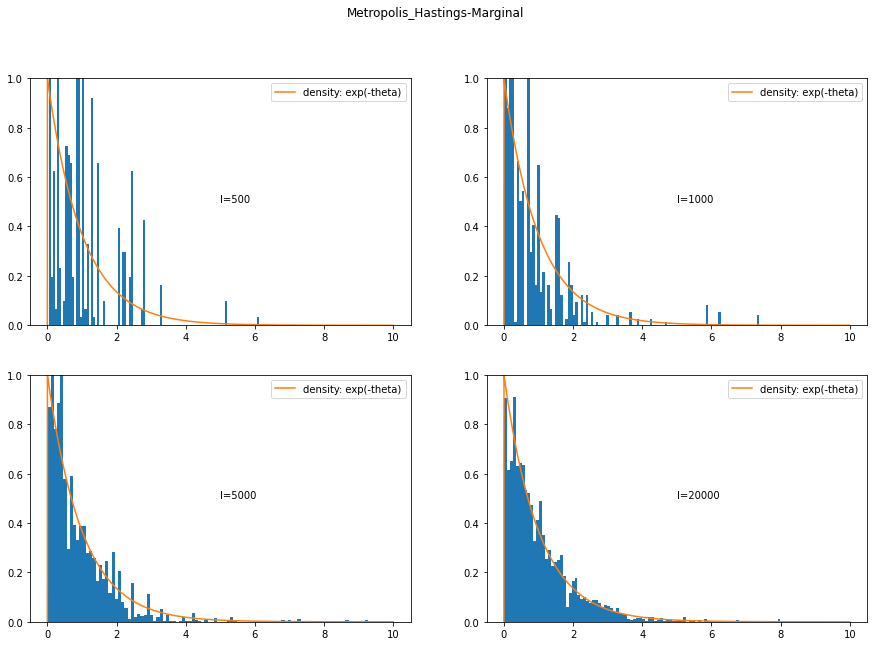

In [ ]:
iter = [500,1000,5000,20000]
fig = plt.figure(figsize=(15,10))

for i in range(len(iter)):
    # input
    T = np.array([])
    t = 0.1 #initialize theta to be 0.1
    for j in range(iter[i]):
        u = np.random.rand() # uniform distribution

        # sample
        t_star = np.random.normal(t,10)

        # compute r
        r = (pi_t(t_star)*q(t_star,t))/(pi_t(t)*q(t,t_star))
        alpha = min(1,r)

        # update
        if u < alpha:
            t = t_star
        T=np.hstack((T,t))

    # histogram
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(T,bins=100,density=True)
    x = np.linspace(0,10,5000)
    y = [pi_t(m) for m in x]
    ax.plot(x,y, label="density: exp(-theta)")
    ax.legend()
    ax.set_ylim(0,1)
    ax.text(5,0.5,'I=%d'%iter[i])
fig.suptitle('Metropolis_Hastings-Marginal')

#### MCWM:

Text(0.5, 0.98, 'MCWM')

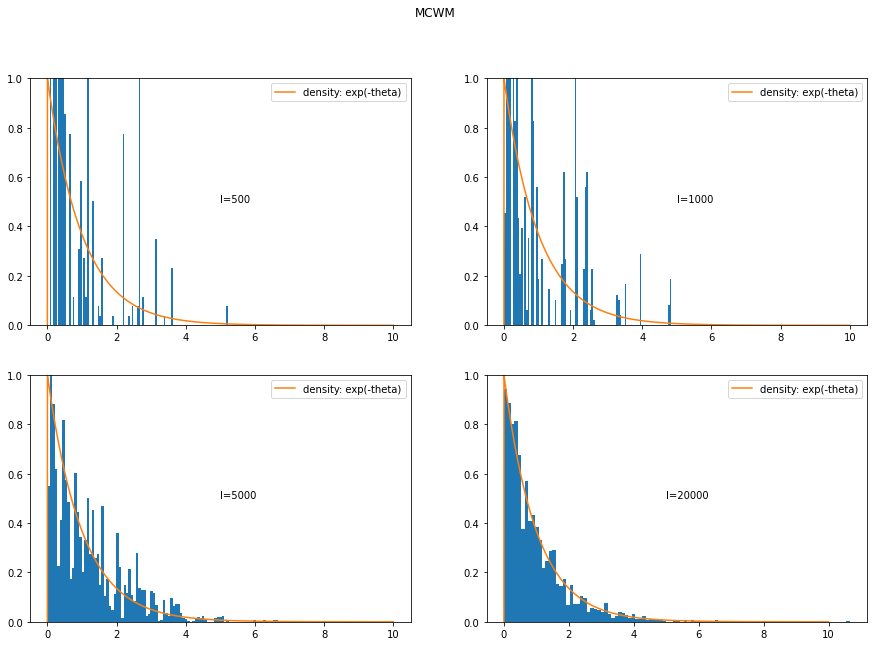

In [ ]:
iter = [500,1000,5000,20000]
N = 500 # number of Z samples
fig = plt.figure(figsize=(15,10))

for i in range(len(iter)):
    # input
    T = np.array([])
    t = 0.1 #initialize theta to be 0.1
    for j in range(iter[i]):
        u = np.random.rand() # uniform distribution

        # sample
        t_star = np.random.normal(t,10)
        Z = np.random.normal(t,10,N)
        Z_star = np.random.normal(t_star,10,N)

        # compute pi_tilde
        pi_N = pi_tilde(t,Z)
        pi_N_star = pi_tilde(t_star,Z_star)

        # compute r
        r = (pi_N_star*q(t_star,t))/(pi_N*q(t,t_star))
        alpha = min(1,r)

        # update
        if u < alpha:
            t = t_star
        T=np.hstack((T,t))
    
    # histograme
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(T,bins=100,density=True)
    x = np.linspace(0,10,5000)
    y = [pi_t(m) for m in x]
    ax.plot(x,y, label="density: exp(-theta)")
    ax.legend()
    ax.set_ylim(0,1)
    ax.text(5,0.5,'I=%d'%iter[i])
fig.suptitle('MCWM')

#### GIMH:

Text(0.5, 0.98, 'GIMH')

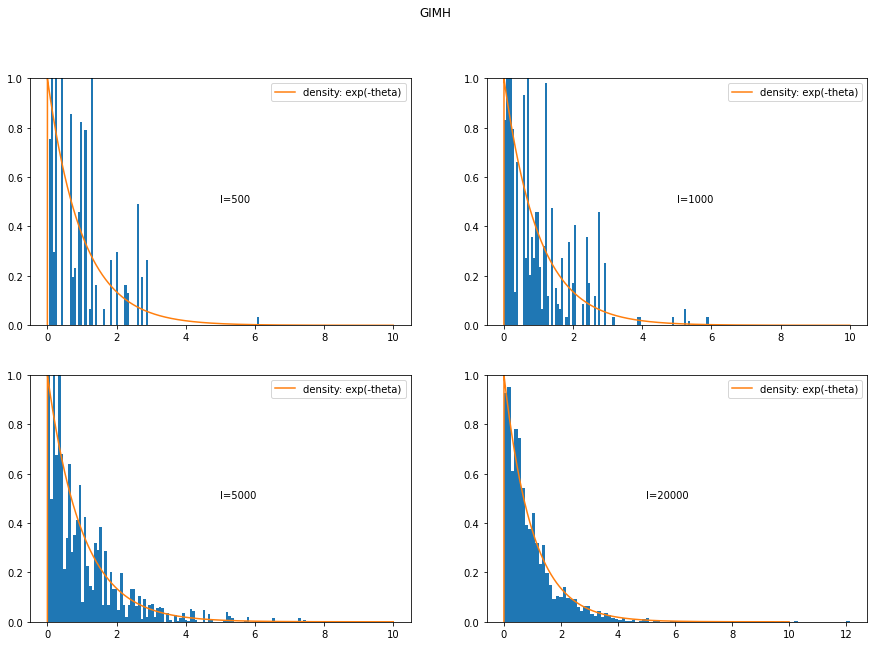

In [ ]:
iter = [500,1000,5000,20000]
N = 500 # number of Z samples
fig = plt.figure(figsize=(15,10))

for i in range(len(iter)):
    # input
    T = np.array([])
    t = 0.1 # initialize theta to be 0.1
    Z = np.random.normal(t,10,N) # initialize Z
    for j in range(iter[i]):
        u = np.random.rand()

        # sample
        t_star = np.random.normal(t,10)
        Z_star = np.random.normal(t_star,10,N)

        # compute pi_tilde
        pi_N = pi_tilde(t,Z)
        pi_N_star = pi_tilde(t_star,Z_star)
        
        # compute r
        r = (pi_N_star*q(t_star,t))/(pi_N*q(t,t_star))
        alpha = min(1,r)

        #update
        if u < alpha:
            t = t_star
            Z = Z_star.copy()
        T=np.hstack((T,t))

    # histograme
    ax = fig.add_subplot(2,2,i+1)
    ax.hist(T,bins=100,density=True)
    x = np.linspace(0,10,5000)
    y = [pi_t(m) for m in x]
    ax.plot(x,y, label="density: exp(-theta)")
    ax.legend()
    ax.set_ylim(0,1)
    ax.text(5,0.5,'I=%d'%iter[i])
fig.suptitle('GIMH')

**Comments:**

> We can see that the three algorithms find the target distribution with 20000 iterations approximately but in the case of Marginal we need to know the target distribution to compute the acceptance.

> For the others algorithm we only need the join distribution and propose a distribution to calculate estimators of the target distribution.

> We also realize that the time of execution of MCWM and GIMH is more expensive than the Marginal case.

> We also see that for 5000 iterations we already have a good estimation of the the distribution in the case of the Marginal algorithm, it shows that it converge faster.

## **Some important questions:**

### Do important sampling gives us unbiased estimators?

> we will proof that $\tilde{\pi}^{N}(θ)$  and $\tilde{\pi}^{N}(\vartheta)$ are the unbiased estimators of $π(θ)$ and $π(ϑ)$  respectively:
  
> Thus we begin by the definition of marginal law $π(θ)$:

$$
 π(θ) = \int π(θ,z) dz = \int π(θ,z)\frac{q_{θ}(z)}{q_{θ}(z)} dz 
$$ 

> where : 
$$
q_{θ}(z) = q(z|θ) \iff z(k)|θ \sim  q_{θ}(.)
$$

> Then:
 $$
 π(θ) = \int \frac{π(θ,z)}{q_{θ}(z)} q(z|θ)dz = E[\frac{π(θ,z)}{q_{θ}(z)}] 
 $$ 

> Thus using LLN, for some integer N ≥ 1 and $\forall k \in {1,2,...,N}$, $(z_{k}) \ i.i.d. $  we have :

 $$
π(θ) = E[\frac{π(θ,z)}{q_{θ}(z)}] \sim \frac{1}{N}\sum_{k=1}^{N}\frac{π(θ,z(k))}{q_{θ}(z(k))}
 $$ 

> with $z(k)|θ $ ~ $q_{θ}(.)$

> In a similar way considering $ʒ(k)|θ $ ~ $q_{ϑ}(.)$ we can show also that:

$$
\tilde{\pi}^{N}(ϑ) = \frac{1}{N}\sum_{k=1}^{N}\frac{π(ϑ,ʒ(k))}{q_{ϑ}(ʒ(k))}
$$


### Why $π(θ)$ by MCMC methods is more convenient by appropriate auxiliary simulation?

> In most Markov models and their continuous generalizations, but also the mixing models, and the problems of model selection in general in a Bayesian frame , $θ$ could represent a parameter of interest and $z$ a missing data set or latent variables.

> For this reason it is very common to introduce the variable z for convenience, particularly in cases where the
marginal density $π(θ)$ is of exclusive interest, as is our case.

> Normally $π(θ)$ could be analytically intractable or too complex to evaluate, while if we introduce the variable $z$, this could give rise to an analytical expression, or facilitate the application of numerical methods.


### A relatively generic way of numerically approximating and Metropolis Hasting Algortihm

> A relatively generic way to approach numerically $π(θ)$ consists in simulating an ergodic Markov chain $(θ_{i},z_{i})$ that admits $π(θ,z)$ as invariable probability density and for it we apply $MCMC$(Markov chain Monte Carlo) techniques that we have seen in the course.

> For sampling of Markov conditionals or ergodic transition probabilities $π(θ|z)$ and $π(z|θ)$ as invariant distributions a typical data augmentation sampling scheme can very often facilitate programming and leading to elegant algorithms, it is well established that in numerous situations they can resulting in strongly positively correlated samples $(θ_{i},z_{i})$ which is
an undesirable property when efficiency is sought.

> On the other hand, if $π(θ)$ were analytically known to be not the case, this would be faster to compute.
